# Lab 5: Simulations

Welcome to lab 5! This week, we will go over iteration and simulations, and introduce the concept of randomness. All of this material is covered in [Chapter 9](https://umass-data-science.github.io/190fwebsite/textbook/09/randomness/) and [Chapter 10](https://umass-data-science.github.io/190fwebsite/textbook/10/sampling-and-empirical-distributions/) of the textbook. 

The data used in this lab will contain salary data and statistics for basketball players from the 2014-2015 NBA season. This data was collected from sports analytic sites [basketball-reference](http://www.basketball-reference.com) and [spotrac](http://www.spotrac.com).

First, set up the tests and imports by running the cell below.

In [1]:
# Run this cell, but please don't change it.
! pip install -U okpy

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

# Don't change this cell; just run it. 
from client.api.notebook import Notebook
ok = Notebook('lab05.ok')
_ = ok.auth(inline=True)



Requirement already up-to-date: okpy in /home/mjasim/anaconda3/lib/python3.6/site-packages (1.13.11)
You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Assignment: Simulations
OK, version v1.13.11

Successfully logged in as mahmood.jasim.bd@gmail.com


## 1. Nachos and Conditionals

In Python, Boolean values can either be `True` or `False`. We get Boolean values when using comparison operators, among which are `<` (less than), `>` (greater than), and `==` (equal to). For a complete list, refer to [Booleans and Comparison](https://umass-data-science.github.io/190fwebsite/textbook/09/randomness/) at the start of Chapter 9.

Run the cell below to see an example of a comparison operator in action.

In [2]:
3 > 1 + 1

True

We can even assign the result of a comparison operation to a variable.

In [3]:
result = 10 / 2 == 5
result

True

Arrays are compatible with comparison operators. The output is an array of boolean values.

In [4]:
make_array(1, 5, 7, 8, 3, -1) > 3

array([False,  True,  True,  True, False, False])

Waiting on the dining table just for you is a hot bowl of nachos! Let's say that whenever you take a nacho, it will have cheese, salsa, both, or neither (just a plain tortilla chip). 

Using the function call `np.random.choice(array_name)`, let's simulate taking nachos from the bowl at random. Start by running the cell below several times, and observe how the results change.

In [5]:
nachos = make_array('cheese', 'salsa', 'both', 'neither')
np.random.choice(nachos)

'salsa'

**Question 1.** Assume we took ten nachos at random, and stored the results in an array called `ten_nachos` as done below. Find the number of nachos with only cheese using code (do not hardcode the answer).  

*Hint:* Our solution involves a comparison operator and the `np.count_nonzero` method.

In [6]:
ten_nachos = make_array('neither', 'cheese', 'both', 'both', 'cheese', 'salsa', 'both', 'neither', 'cheese', 'both')
number_cheese = ...
number_cheese

Ellipsis

In [7]:
#Solution
ten_nachos = make_array('neither', 'cheese', 'both', 'both', 'cheese', 'salsa', 'both', 'neither', 'cheese', 'both')
number_cheese = np.count_nonzero(ten_nachos=="cheese")
number_cheese

3

In [8]:
_ = ok.grade('q1_1')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Conditional Statements**

A conditional statement is made up of many lines that allow Python to choose from different alternatives based on whether some condition is true.

Here is a basic example.

```
def sign(x):
    if x > 0:
        return 'Positive'
```

How the function works is if the input `x` is greater than `0`, we get the string `'Positive'` back.

If we want to test multiple conditions at once, we use the following general format.

```
if <if expression>:
    <if body>
elif <elif expression 0>:
    <elif body 0>
elif <elif expression 1>:
    <elif body 1>
...
else:
    <else body>
```

Only one of the bodies will ever be executed. Each `if` and `elif` expression is evaluated and considered in order, starting at the top. As soon as a true value is found, the corresponding body is executed, and the rest of the expression is skipped. If none of the `if` or `elif` expressions are true, then the `else body` is executed. For more examples and explanation, refer to [Section 9.1](https://umass-data-science.github.io/190fwebsite/textbook/09/1/conditional-statements/).

**Question 2.** Complete the following conditional statement so that the string `'More please'` is assigned to `say_please` if the number of nachos with cheese in `ten_nachos` is less than `5`.

*Hint*: You should not have to directly reference the variable `ten_nachos`, you can use 
`number_cheese`.

In [9]:
say_please = '?'

if ...:
    say_please = 'More please'
    
say_please

'More please'

In [10]:
#Solution

say_please = '?'

if number_cheese<5:
    say_please = 'More please'
    
say_please

'More please'

In [11]:
_ = ok.grade('q1_2')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 3.** Write a function called `nacho_reaction` that returns a string based on the type of nacho passed in as an argument. From top to bottom, the conditions should correspond to: `'cheese'`, `'salsa'`, `'both'`, `'neither'`.  

In [12]:
def nacho_reaction(nacho):
    if ...:
        return 'Cheesy!'
    # next condition should return 'Spicy!'
    ...
    # next condition should return 'Wow!'
    ...
    # next condition should return 'Meh.'
    ...

spicy_nacho = nacho_reaction('salsa')
spicy_nacho

'Cheesy!'

In [13]:
#Solution
def nacho_reaction(nacho):
    if nacho == nachos[0]:
        return 'Cheesy!'
    elif nacho == nachos[1]:
        return 'Spicy!'
    elif nacho == nachos[2]:
        return 'Wow!'
    elif nacho == nachos[3]:
        return 'Meh.'

spicy_nacho = nacho_reaction('salsa')
spicy_nacho

'Spicy!'

In [14]:
_ = ok.grade('q1_3')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 4.** Add a column `'Reactions'` to the table `ten_nachos_reactions` that consists of reactions for each of the nachos in `ten_nachos`. 

*Hint:* Use the `apply` method. 

In [15]:
ten_nachos_reactions = Table().with_column('Nachos', ten_nachos)
...
ten_nachos_reactions

Nachos
neither
cheese
both
both
cheese
salsa
both
neither
cheese
both


In [16]:
#Solution:
ten_nachos_reactions = Table().with_column('Nachos', ten_nachos)
ten_nachos_reactions=ten_nachos_reactions.with_column('Reactions',ten_nachos_reactions.apply(nacho_reaction, 'Nachos'))
ten_nachos_reactions

Nachos,Reactions
neither,Meh.
cheese,Cheesy!
both,Wow!
both,Wow!
cheese,Cheesy!
salsa,Spicy!
both,Wow!
neither,Meh.
cheese,Cheesy!
both,Wow!


In [17]:
_ = ok.grade('q1_4')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 5.** Using code, find the number of `'Wow!'` reactions for the nachos in `ten_nachos_reactions`.

In [18]:
number_wow_reactions = ...
number_wow_reactions

Ellipsis

In [19]:
#Solution
number_wow_reactions = ten_nachos_reactions.where("Reactions",are.equal_to("Wow!")).num_rows
number_wow_reactions

4

In [20]:
_ = ok.grade('q1_5')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



**Question 6.** Complete the function `both_or_neither`, which takes in a table of nachos with reactions (just like the one from Question 4) and returns `'Wow!'` if there are more nachos with both cheese and salsa, or `'Meh.'` if there are more nachos with neither. If there are an equal number of each, return `'Okay!'`.

In [21]:
def both_or_neither(nacho_table):
    reactions = ...
    number_wow_reactions = ...
    number_meh_reactions = ...
    if ...:
        return 'Wow!'
    # next condition should return 'Meh.'
    ...
    # next condition should return 'Okay!'
    ...

many_nachos = Table().with_column('Nachos', np.random.choice(nachos, 250))
many_nachos = many_nachos.with_column('Reactions', many_nachos.apply(nacho_reaction, 'Nachos'))
result = both_or_neither(many_nachos)
result

'Wow!'

In [22]:
#Solution
def both_or_neither(nacho_table):
    reactions = nacho_table.column("Reactions")
    number_wow_reactions = np.sum(reactions=='Wow!')
    number_meh_reactions = np.sum(reactions=='Meh.')

    if number_wow_reactions>number_meh_reactions:
        return 'Wow!'
    elif number_wow_reactions<number_meh_reactions:
        return 'Meh.'
    else:
        return 'Okay!'

many_nachos = Table().with_column('Nachos', np.random.choice(nachos, 250))
many_nachos = many_nachos.with_column('Reactions', many_nachos.apply(nacho_reaction, 'Nachos'))
result = both_or_neither(many_nachos)
result

'Meh.'

In [23]:
_ = ok.grade('q1_6')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



## 2. Simulations
Using a `for` statement, we can perform a task multiple times. This is known as iteration. Here, we'll simulate drawing different suits from a deck of cards. 

In [24]:
suits = make_array("♤", "♡", "♢", "♧")

draws = make_array()

repetitions = 6

for i in np.arange(repetitions):
    draws = np.append(draws, np.random.choice(suits))

draws

array(['♡', '♡', '♢', '♡', '♡', '♤'], dtype='<U32')

In the example above, the `for` loop appends a random draw to the `draws` array for every number in `np.arange(repetitions)`. 

"Here's a nice way to think of what we did above. We had a deck of 4 cards of different suits, we randomly drew one card, saw the suit, kept track of it in `draws`, and put the card back into the deck. We repeated this for a total of 6 times without having to repeat code, thanks to the for loop. We simulated this experiment using a `for` loop. 

Another use of iteration is to loop through a set of values. For instance, we can print out all of the colors of the rainbow.


In [25]:
rainbow = make_array("red", "orange", "yellow", "green", "blue", "indigo", "violet")

for color in rainbow:
    print(color)

red
orange
yellow
green
blue
indigo
violet


We can see that the indented part of the `for` loop, known as the body, is executed once for each item in `rainbow`. Note that the name `color` is arbitrary; we could easily have named it something else. The important thing is we stay consistent throughout the for loop. 

In [26]:
for another_name in rainbow:
    print(another_name)

red
orange
yellow
green
blue
indigo
violet


In general, however, we would like the variable name to be somewhat informative. 

**Question 1.** Clay is playing darts. His dartboard contains ten equal-sized zones with point values from 1 to 10. Write code that simulates his total score after 1000 dart tosses. Make sure to use a `for` loop.

*Hint:* There are a few steps to this problem (and most simulations): 
1. Figuring out the big picture of what we want to simulate (the total score after 1000 dart tosses)
2. Deciding the possible values you can take in the experiment (point values in this case) and simulating one example (throwing one dart)
3. Deciding how many times to run through the experiment (1000 tosses in our case) and keeping track of the total information of each time you ran through the experiment (the total score in this case)
4. Coding up the whole simulation!

In [27]:
possible_point_values = ...
tosses = 1000
total_score = ...

# a for loop would be useful here



total_score

Ellipsis

In [28]:
#Solution
possible_point_values = np.arange(10)+1
tosses = 1000
total_score = 0

for i in range(tosses):
    total_score = total_score + np.random.choice(possible_point_values)

total_score

5463

In [29]:
_ = ok.grade('q2_1')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 2.** In the following cell, we've loaded the text of _Pride and Prejudice_ by Jane Austen, split it into individual words, and stored these words in an array. Using a `for` loop, assign `longer_than_five` to the number of words in the novel that are more than 5 letters long.

*Hint*: You can find the number of letters in a word with the `len` function.

In [30]:
austen_string = open('Austen_PrideAndPrejudice.txt', encoding='utf-8').read()
p_and_p_words = np.array(austen_string.split())

longer_than_five = ...

# a for loop would be useful here


longer_than_five

Ellipsis

In [31]:
#Solution
austen_string = open('Austen_PrideAndPrejudice.txt', encoding='utf-8').read()
p_and_p_words = np.array(austen_string.split())

longer_than_five = 0

for word in p_and_p_words:
    longer_than_five = longer_than_five + (len(word)>5)

# a for loop would be useful here

longer_than_five

35453

In [32]:
_ = ok.grade('q2_2')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 3.** Using simulation with 10,000 trials, assign `chance_of_all_different` to an estimate of the chance that if you pick three words from Pride and Prejudice uniformly at random (with replacement), they all have different lengths. 

*Hint*: Remember that `!=` only checks for non-equality between two items, not three. However, you can use `!=` more than once in the same line. You can also use `and` to join several conditional together.


In [33]:
trials = 10000
different = ...

for ... in ...:
    ...

chance_of_all_different = ...

chance_of_all_different

SyntaxError: can't assign to Ellipsis (<ipython-input-33-8be3b2e2d776>, line 4)

In [34]:
#Solution
trials = 10000
different = 0

for i in range(trials):
    words = np.random.choice(p_and_p_words,3)
    if(len(words[0])!=len(words[1]) and len(words[0])!=len(words[2]) and len(words[1])!=len(words[2])):
        different=different+1
        
chance_of_all_different = different/trials

chance_of_all_different

0.633

In [35]:
_ = ok.grade('q2_3')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



** Question 4. ** LeBron James is drafting Basketball Players for his NBA Fantasy League. He chooses 10 times randomly from a list of players, and drafts the player regardless of whether the player has been chosen before (You could have 10 Kevin Durant's on a team!). Count how many times John Wall is chosen in a version of LeBron's draft.

In [36]:
players = ["John Wall", "Kevin Durant", "Kyrie Irving", "Joel Embiid", "Russell Westbrook"]
draft_picks = ...
num_wall = ...

for ... in ...:
    ...

num_wall

SyntaxError: can't assign to Ellipsis (<ipython-input-36-a34503f67f66>, line 5)

In [37]:
#Solution

players = ["John Wall", "Kevin Durant", "Kyrie Irving", "Joel Embiid", "Russell Westbrook"]
draft_picks = np.random.choice(players,10)
num_wall = np.sum(draft_picks=="John Wall")

num_wall

3

In [38]:
_ = ok.grade('q2_4')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



Congratulations, you're done with Lab 5!  Be sure to 
- **run all the tests** (the next cell has a shortcut for that), 
- **Save and Checkpoint** from the `File` menu,
- **run the cell below to submit your work**,
- and ask one of the staff members to check you off.

In [39]:
# For your convenience, you can run this cell to run all the tests at once!
import os
_ = [ok.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q1') or q.startswith('q2')]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------

In [40]:
_ = ok.submit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Could not save your notebook. Make sure your notebook is saved before sending it to OK!
Submit... 0.0% complete
Could not submit: Assignment does not exist
Backup... 0.0% complete
Could not backup: Assignment does not exist



## 3. Sampling 

** The rest of this notebook is optional. Please make sure you submit the above sections! The questions in this section are good practice for Sampling, which is included on the next assignment. ** 

The questions in this data set use NBA player statistics. Run the cell below to load the player and salary data. 

In [41]:
player_data = Table().read_table("player_data.csv")
salary_data = Table().read_table("salary_data.csv")
full_data = salary_data.join("PlayerName", player_data, "Name")
# The show method immediately displays the contents of a table. 
# This way, we can display the top of two tables using a single cell.
player_data.show(3)
salary_data.show(3)
full_data.show(3)

Name,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
James Harden,25,HOU,81,459,565,154,60,321,2217
Chris Paul,29,LAC,82,376,838,156,15,190,1564
Stephen Curry,26,GSW,80,341,619,163,16,249,1900


PlayerName,Salary
Kobe Bryant,23500000
Amar'e Stoudemire,23410988
Joe Johnson,23180790


PlayerName,Salary,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
A.J. Price,62552,28,TOT,26,32,46,7,0,14,133
Aaron Brooks,1145685,30,CHI,82,166,261,54,15,157,954
Aaron Gordon,3992040,19,ORL,47,169,33,21,22,38,243


Rather than getting data on every player, imagine that we had gotten data on only a smaller subset of the players.  For 492 players, it's not so unreasonable to expect to see all the data, but usually we aren't so lucky.  Instead, we often make *statistical inferences* about a large underlying population using a smaller sample.

To save typing and increase the clarity of your code, we will package the loading and analysis code into two functions. This will be useful in the rest of the lab as we will repeatedly need to create histograms and collect summary statistics from that data.

**Question 3.1**. Complete the `histograms` function, which takes a table with columns `Age` and `Salary` and draws a histogram for each one. Use the min and max functions to pick the bin boundaries so that all data appears for any table passed to your function. Use the same bin widths as before (1 year for `Age` and $1,000,000 for `Salary`).

*Hint*: When creating the bins for the the histograms, think critically about what the stop argument should be for `np.arange`. Histograms are inclusive on the left hand side of the interval, but not the right. So, if we have a maximum age of 80, we need a 80-81 bin in order to capture this in the histogram. 

TypeError: `bins` must be an integer, a string, or an array

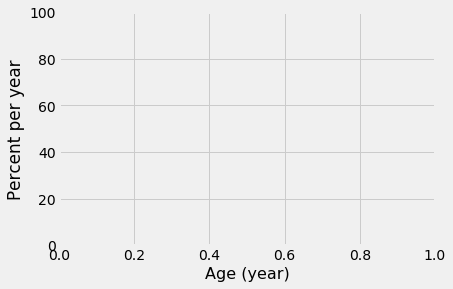

In [42]:
def histograms(t):
    ages = t.column('Age')
    salaries = t.column('Salary')
    age_bins = ...
    salary_bins = ...
    t.hist('Age', bins=age_bins, unit='year')
    t.hist('Salary', bins=salary_bins, unit='$')
    return age_bins # Keep this statement so that your work can be checked
    
histograms(full_data)
print('Two histograms should be displayed below')

Two histograms should be displayed below


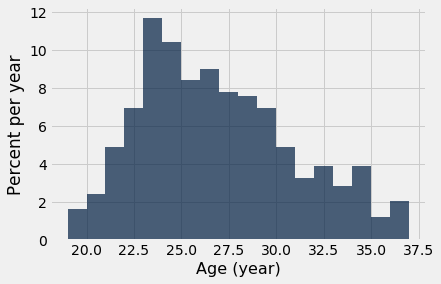

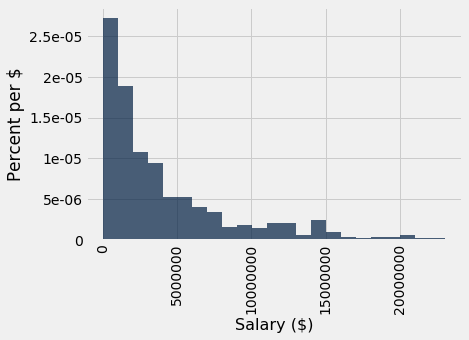

In [43]:
#Solution
def histograms(t):
    ages = t.column('Age')
    salaries = t.column('Salary')
    age_bins = np.arange(np.min(ages),np.max(ages))
    salary_bins = np.arange(np.min(salaries),np.max(salaries),10**6)
    t.hist('Age', bins=age_bins, unit='year')
    t.hist('Salary', bins=salary_bins, unit='$')
    return age_bins # Keep this statement so that your work can be checked
    
histograms(full_data)
print('Two histograms should be displayed below')

In [44]:
_ = ok.grade('q3_1') # Warning: Charts will be displayed while running this test

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Question > Suite 1 > Case 1

>>> round(float(compute_statistics(full_data)[0]), 2) == 26.54
NameError: name 'compute_statistics' is not defined

# Error: expected
#     True
# but got
#     Traceback (most recent call last):
#       ...
#     NameError: name 'compute_statistics' is not defined

Run only this test case with "python3 ok -q q3_1 --suite 1 --case 1"
---------------------------------------------------------------------
Test summary
    Passed: 0
    Failed: 1
[k..........] 0.0% passed



**Question 3.2**. Create a function called `compute_statistics` that takes a Table containing ages and salaries and:
- Draws a histogram of ages
- Draws a histogram of salaries
- Returns a two-element array containing the average age and average salary

You can call your `histograms` function to draw the histograms!

In [64]:
def compute_statistics(age_and_salary_data):
    ...
    age = ...
    salary = ...
    ...
    

full_stats = compute_statistics(full_data)

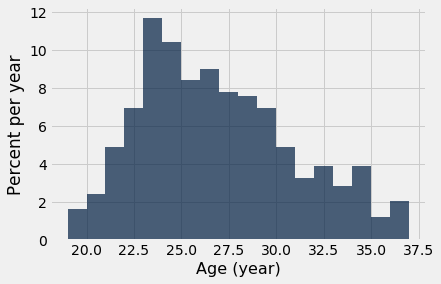

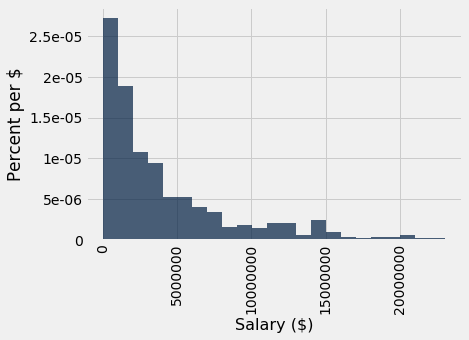

In [65]:
#Solutions

def compute_statistics(age_and_salary_data):
    
    ages = age_and_salary_data.column('Age')
    salaries = age_and_salary_data.column('Salary')
    histograms(age_and_salary_data)
    return make_array(np.mean(ages),np.mean(salaries))
    
full_stats = compute_statistics(full_data)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



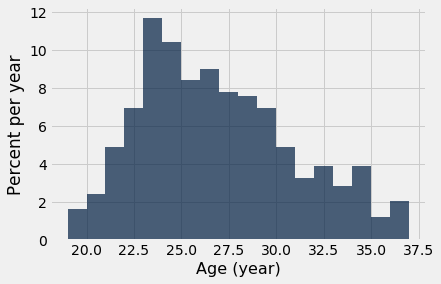

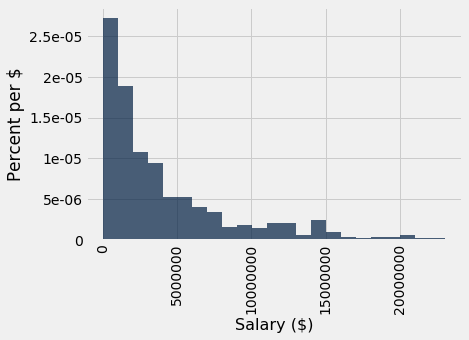

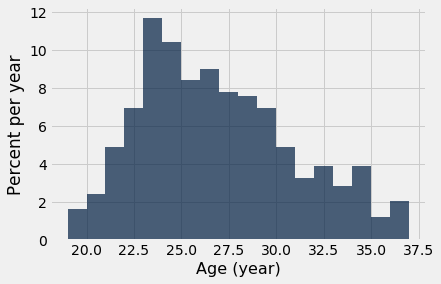

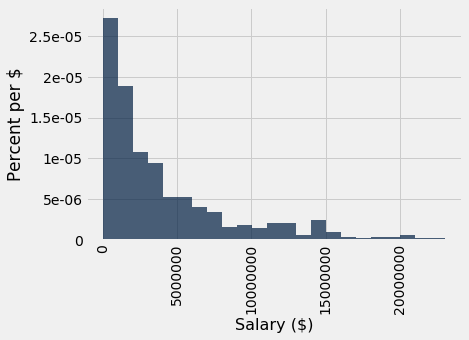

In [66]:
_ = ok.grade('q3_2') # Warning: Charts will be displayed while running this test

### Convenience sampling
One sampling methodology, which is **generally a bad idea**, is to choose players who are somehow convenient to sample.  For example, you might choose players from one team that's near your house, since it's easier to survey them.  This is called, somewhat pejoratively, *convenience sampling*.

Suppose you survey only *relatively new* players with ages less than 22.  (The more experienced players didn't bother to answer your surveys about their salaries.)

**Question 3.3**  Assign `convenience_sample_data` to a subset of `full_data` that contains only the rows for players under the age of 22.

In [67]:
convenience_sample = ...
convenience_sample

Ellipsis

In [68]:
#Solution
convenience_sample = full_data.where('Age',are.below(22))
convenience_sample

PlayerName,Salary,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
Aaron Gordon,3992040,19,ORL,47,169,33,21,22,38,243
Alex Len,3649920,21,PHO,69,454,32,34,105,74,432
Andre Drummond,2568360,21,DET,82,1104,55,73,153,120,1130
Andrew Wiggins,5510640,19,MIN,82,374,170,86,50,177,1387
Anthony Bennett,5563920,21,MIN,57,216,48,27,16,36,298
Anthony Davis,5607240,21,NOP,68,696,149,100,200,95,1656
Archie Goodwin,1112280,20,PHO,41,74,44,18,9,48,231
Ben McLemore,3026280,21,SAC,82,241,140,77,19,138,996
Bradley Beal,4505280,21,WAS,63,241,194,76,18,123,962
Bruno Caboclo,1458360,19,TOR,8,2,0,0,1,4,10


In [69]:
_ = ok.grade('q3_3')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



**Question 3.4** Assign `convenience_stats` to a list of the average age and average salary of your convenience sample, using the `compute_statistics` function.  Since they're computed on a sample, these are called *sample averages*. 

In [70]:
convenience_stats = ...
convenience_stats

Ellipsis

array([2.03636364e+01, 2.38353382e+06])

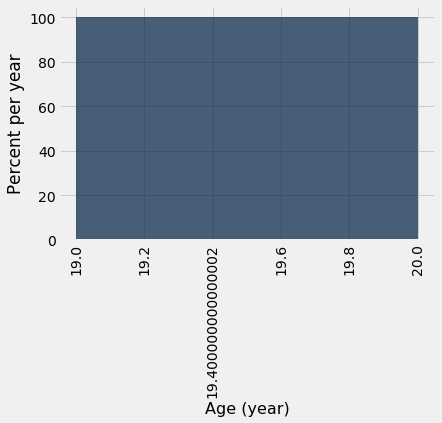

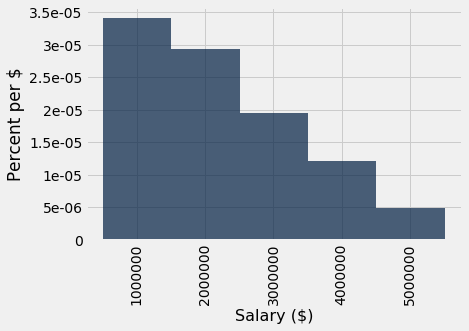

In [71]:
convenience_stats = compute_statistics(convenience_sample)
convenience_stats

In [72]:
_ = ok.grade('q3_4')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



Next, we'll compare the convenience sample salaries with the full data salaries in a single histogram. To do that, we'll need to use the `bin_column` option of the `hist` method, which indicates that all columns are counts of the bins in a particular column. The following cell should not require any changes; just run it.

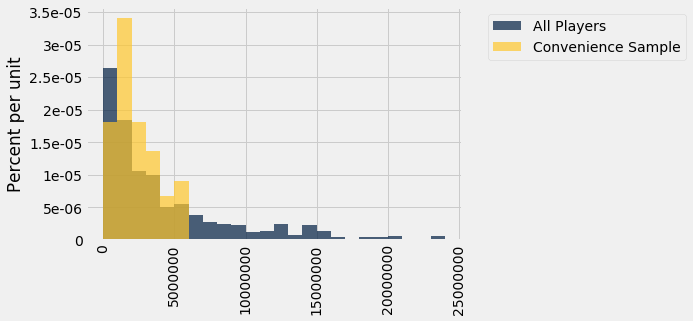

In [73]:
def compare_salaries(first, second, first_title, second_title):
    """Compare the salaries in two tables."""
    max_salary = max(np.append(first.column('Salary'), second.column('Salary')))
    bins = np.arange(0, max_salary+1e6+1, 1e6)
    first_binned = first.bin('Salary', bins=bins).relabeled(1, first_title)
    second_binned = second.bin('Salary', bins=bins).relabeled(1, second_title)
    first_binned.join('bin', second_binned).hist(bin_column='bin')

compare_salaries(full_data, convenience_sample, 'All Players', 'Convenience Sample')

**Question 3.5** Does the convenience sample give us an accurate picture of the age and salary of the full population of NBA players in 2014-2015?  Would you expect it to, in general?  Before you move on, write a short answer in English below.  You can refer to the statistics calculated above or perform your own analysis.

*Write your answer here, replacing this text.*

Solution: No, the sample of yonger players is not representitive of the full population since non have higher salaries.

### Simple random sampling
A more principled approach is to sample uniformly at random from the players.  If we ensure that each player is selected at most once, this is a *simple random sample without replacement*, sometimes abbreviated to "simple random sample" or "SRSWOR".  Imagine writing down each player's name on a card, putting the cards in an urn, and shuffling the urn.  Then, pull out cards one by one and set them aside, stopping when the specified *sample size* is reached.

We've produced two samples of the `salary_data` table in this way: `small_srswor_salary.csv` and `large_srswor_salary.csv` contain, respectively, a sample of size 44 (the same as the convenience sample) and a larger sample of size 100.  

The `load_data` function below loads a salary table and joins it with `player_data`.

In [74]:
def load_data(salary_file):
    return player_data.join('Name', Table.read_table(salary_file), 'PlayerName')

**Question 3.6** Run the same analyses on the small and large samples that you previously ran on the full dataset and on the convenience sample.  Compare the accuracy of the estimates of the population statistics that we get from the convenience sample, the small simple random sample, and the large simple random sample.  (Just notice this for yourself -- the autograder will check your sample statistics but will not validate whatever you do to compare.)

In [75]:
# Original:
small_srswor_data = ...
small_stats = ...
large_srswor_data = ...
large_stats = ...
print('Full data stats:                 ', full_stats)
print('Small simple random sample stats:', small_stats)
print('Large simple random sample stats:', large_stats)

Full data stats:                  [2.65365854e+01 4.26977577e+06]
Small simple random sample stats: Ellipsis
Large simple random sample stats: Ellipsis


In [1]:
# Solution:
small_srswor_data = load_data("small_srswor_salary.csv")
small_stats = compute_statistics(small_srswor_data)
large_srswor_data = load_data("large_srswor_salary.csv")
large_stats = compute_statistics(large_srswor_data)
print('Full data stats:                 ', full_stats)
print('Small simple random sample stats:', small_stats)
print('Large simple random sample stats:', large_stats)

NameError: name 'load_data' is not defined

In [77]:
_ = ok.grade('q3_6')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 4
    Failed: 0
[ooooooooook] 100.0% passed



### Producing simple random samples
Often it's useful to take random samples even when we have a larger dataset available.  The randomized response technique was one example we saw in lecture.  Another is to help us understand how inaccurate other samples are.

Tables provide the method `sample()` for producing random samples.  Note that its default is to sample with replacement. To sample without replacement use `sample(with_replacement=False)`.

**Question 3.7** Produce a simple random sample of size 44 from `full_data`.  (You don't need to bother with a join this time -- just use `full_data.sample(...)` directly.  That will have the same result as sampling from `salary_data` and joining with `player_data`.)  Run your analysis on it again.  
- Are your results roughly similar to those in the small sample we provided you?  Run your code several times to get new samples.  
- How much does the average age change across samples? 
- What about average salary?

In [78]:
my_small_srswor_data = ...
my_small_stats = ...
my_small_stats

Ellipsis

array([2.66590909e+01, 4.23144523e+06])

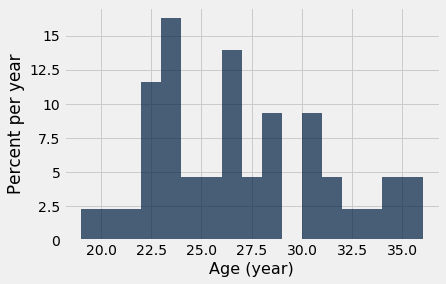

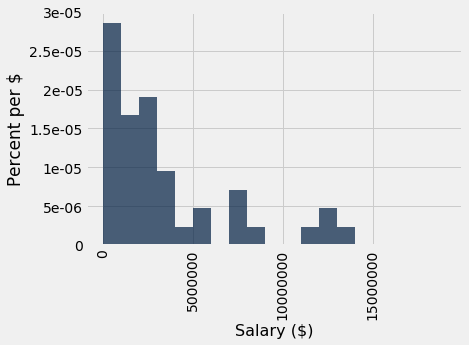

In [79]:
#Solution
my_small_srswor_data = full_data.sample(44,with_replacement=False)
my_small_stats = compute_statistics(my_small_srswor_data)
my_small_stats

*Write your answer here, replacing this text.*

**Question 3.8** As in the previous question, analyze several simple random samples of size 100 from `full_data`.  
- Do the histogram statistics seem to change more or less across samples of 100 than across samples of size 44?  
- Are the sample averages and histograms closer to their true values for age or for salary?  What did you expect to see?

In [80]:
my_large_srswor_data = ...
...

array([2.64000000e+01, 3.75238677e+06])

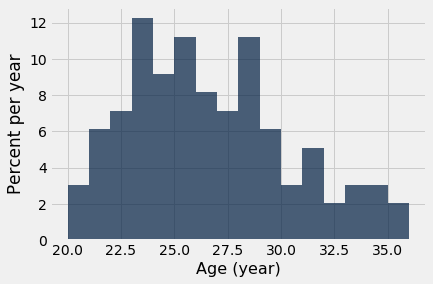

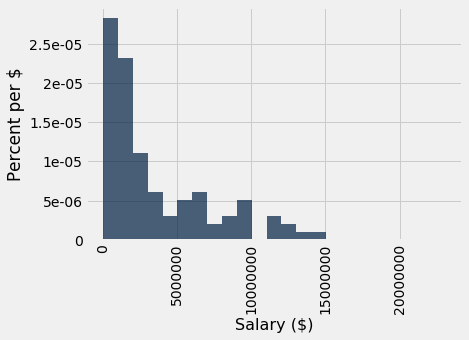

In [81]:
#Solution
my_small_srswor_data = full_data.sample(100,with_replacement=False)
my_small_stats = compute_statistics(my_small_srswor_data)
my_small_stats

*Write your answer here, replacing this text.*

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
 > Suite 1 > Case 1

>>> num_wall == 2
False

# Error: expected
#     True
# but got
#     False

Run only this test case with "python3 ok -q q2_4 --suite 1 --case 1"
---------------------------------------------------------------------
Test summary
    Passed: 0
    Failed: 1
[k..........] 0.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Question > Suite 1 > Case 1

>>> old = full_data.with_column('Age', full_data.column('Age')*3)
>>> np.max(histograms(old)) > np.max(old.column('Age'))
False

# 

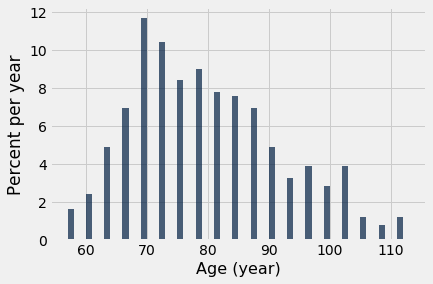

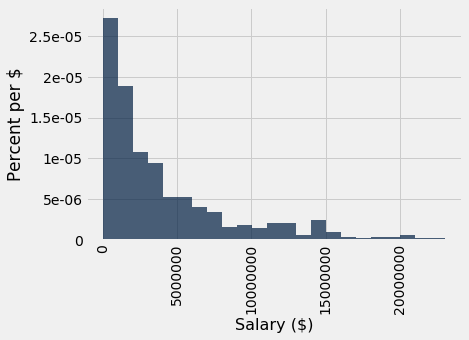

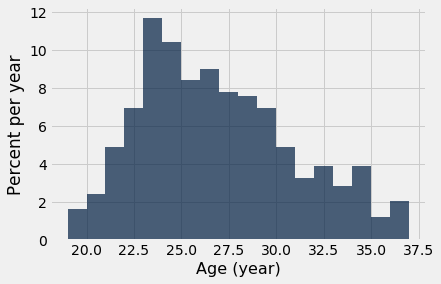

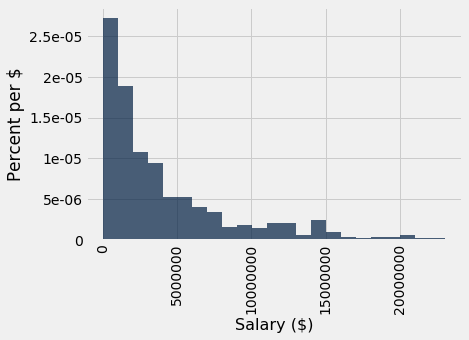

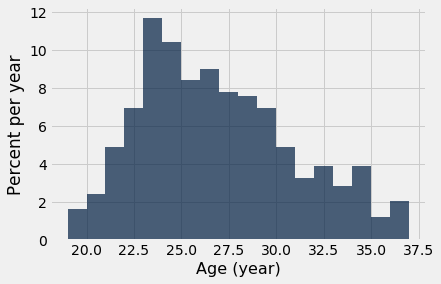

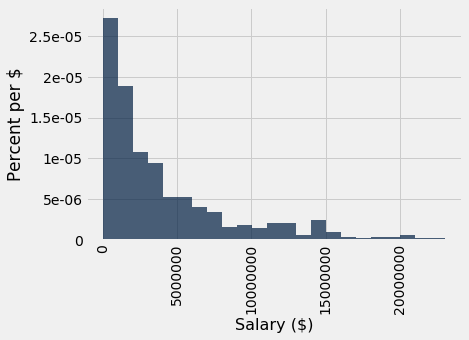

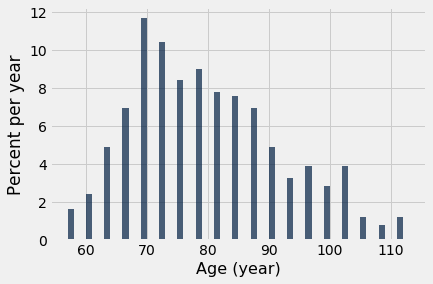

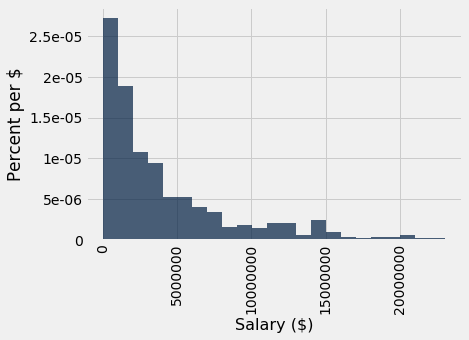

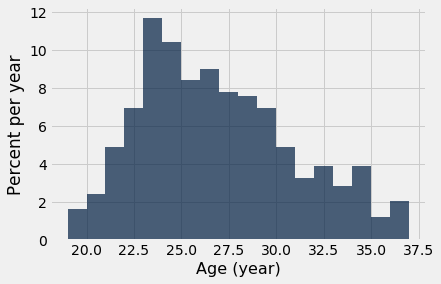

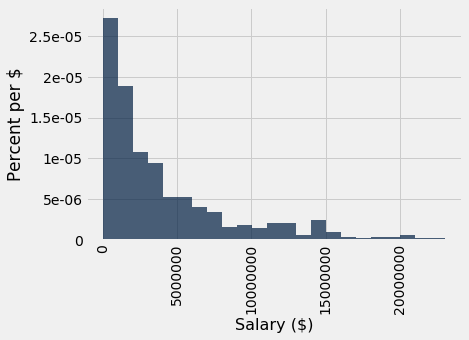

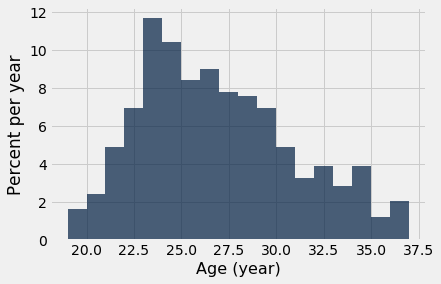

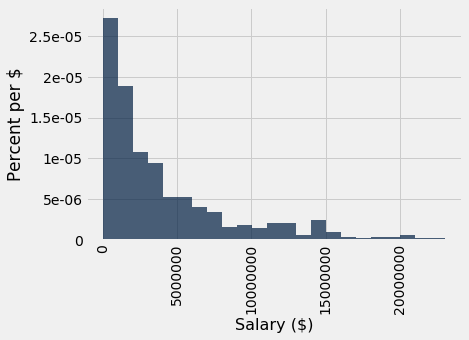

In [82]:
# For your convenience, you can run this cell to run all the tests at once!
import os
_ = [ok.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q')]

In [83]:
_ = ok.submit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Could not save your notebook. Make sure your notebook is saved before sending it to OK!
Submit... 0.0% complete
Could not submit: Assignment does not exist

